In [1]:
import torch 
import torch.utils.data 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Hyper-parameters
Epochs = 35
LearningRate = 0.02
BatchSize = 32
InputSize = 1
OutputSize = 1

torch.Size([250, 1])
torch.Size([250, 1])


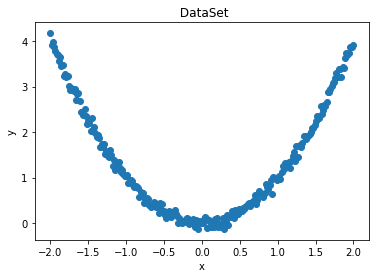

In [11]:
# Data 
xdata = torch.unsqueeze(torch.linspace(-2,2,250),dim=1)
ydata = xdata.pow(2) + 0.08*torch.normal(torch.zeros(*xdata.size()))
print(xdata.size())
print(ydata.size())
# Draw distribution graph
plt.title(' DataSet')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xdata,ydata)
plt.show()

In [12]:
# Use to batch training
# You can see over 1-3 ,Batch
DataSet = torch.utils.data.TensorDataset(xdata,ydata)
DataLoader = torch.utils.data.DataLoader(dataset=DataSet,batch_size=BatchSize,num_workers=4,shuffle=True)


In [13]:
# Define Neural Network
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.n1 = nn.Linear(InputSize,16)
        self.n2 = nn.Linear(16,OutputSize)
        
    def forward(self,x):
        x = F.relu(self.n1(x))
        x = self.n2(x)
        return x 

In [14]:
# Build Neural Network
Model_SGD       = Model()
Model_Adam      = Model()
Model_Momentum  = Model()
Model_RMSprop   = Model()

Models = [Model_SGD,Model_Adam,Model_Momentum,Model_RMSprop]
#print(Models)

for i in Models:
    print(i)

Model(
  (n1): Linear(in_features=1, out_features=16, bias=True)
  (n2): Linear(in_features=16, out_features=1, bias=True)
)
Model(
  (n1): Linear(in_features=1, out_features=16, bias=True)
  (n2): Linear(in_features=16, out_features=1, bias=True)
)
Model(
  (n1): Linear(in_features=1, out_features=16, bias=True)
  (n2): Linear(in_features=16, out_features=1, bias=True)
)
Model(
  (n1): Linear(in_features=1, out_features=16, bias=True)
  (n2): Linear(in_features=16, out_features=1, bias=True)
)


In [15]:
# Record 4 optimizer loss
#loss_Record = np.zeros(4)
loss_Record = [[],[],[],[]]

# Optimizer 
Optimizer_SGD      = torch.optim.SGD(Model_SGD.parameters(),lr=LearningRate)
Optimizer_Adam     = torch.optim.Adam(Model_Adam.parameters(),lr=LearningRate)
Optimizer_Momentum = torch.optim.SGD(Model_Momentum.parameters(),lr=LearningRate,momentum=0.8)
Optimizer_RMSprop  = torch.optim.RMSprop(Model_RMSprop.parameters(),lr=LearningRate,alpha=0.9)
Optimizers = [Optimizer_SGD,Optimizer_Adam,Optimizer_Momentum,Optimizer_RMSprop]

# Loss
loss_func = nn.MSELoss()

# Show training process
for model,optimizer,loss in zip(Models,Optimizers,loss_Record):
    print(type(model))
    print(type(optimizer))
    print(type(loss))
    print(model,'\n',optimizer,'\n',loss)
    print('\n\n')

<class '__main__.Model'>
<class 'torch.optim.sgd.SGD'>
<class 'list'>
Model(
  (n1): Linear(in_features=1, out_features=16, bias=True)
  (n2): Linear(in_features=16, out_features=1, bias=True)
) 
 SGD (
Parameter Group 0
    dampening: 0
    lr: 0.02
    momentum: 0
    nesterov: False
    weight_decay: 0
) 
 []



<class '__main__.Model'>
<class 'torch.optim.adam.Adam'>
<class 'list'>
Model(
  (n1): Linear(in_features=1, out_features=16, bias=True)
  (n2): Linear(in_features=16, out_features=1, bias=True)
) 
 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.02
    weight_decay: 0
) 
 []



<class '__main__.Model'>
<class 'torch.optim.sgd.SGD'>
<class 'list'>
Model(
  (n1): Linear(in_features=1, out_features=16, bias=True)
  (n2): Linear(in_features=16, out_features=1, bias=True)
) 
 SGD (
Parameter Group 0
    dampening: 0
    lr: 0.02
    momentum: 0.8
    nesterov: False
    weight_decay: 0
) 
 []



<class '__main__.Model'>
<class 'torch.

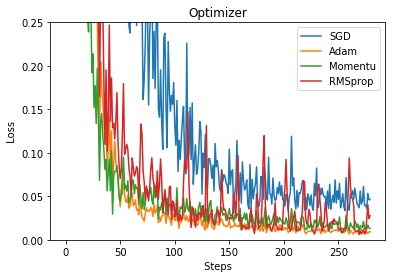

In [16]:
# Training 
for epoch in range(Epochs):
    for step,(bx,by) in enumerate(DataLoader):
        for model,optimizer,loss_history in zip(Models,Optimizers,loss_Record):
            # Input data to predict
            output = model(bx)
            loss = loss_func(output,by)
            # Updare gradient
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Record each model loss
            loss_history.append(loss.item())
# Make label to plot
labels = ['SGD','Adam','Momentu','RMSprop']

for num,loss_history in enumerate(loss_Record):
    plt.plot(loss_history ,label=labels[num])

plt.legend(loc='best')
plt.xlabel(' Steps ')
plt.ylabel(' Loss ')
plt.title('Optimizer')
plt.ylim((0, 0.25))

plt.show()